# **CosmiCode-Internship Week-4**

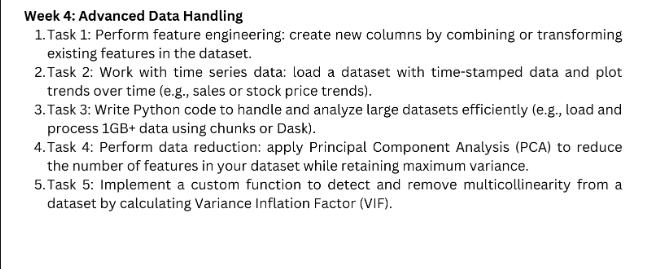

## Task-1: Feature Engineering

- It's the process of creating new, more informative features from raw data to improve the performance of a model.
- Combining features: Add, subtract, multiply, or divide two columns.
- Transforming features: Apply mathematical transformations like logarithms, exponentials, or normalizations.
- Eg: you got two columns, of height and weight respectively, use both to make a new table of BMI


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('Datasets/obesity_dataset/Dataset.csv', sep=';', encoding='latin-1')

# Step 1: Combine 'Student Country' and 'Topic'
df['Country-Topic'] = df['Student Country'] + '-' + df['Topic']

# Display the first few rows to verify the new column
print(df[['Student Country', 'Topic', 'Country-Topic']].head())




  Student Country       Topic        Country-Topic
0         Ireland  Statistics   Ireland-Statistics
1        Portugal  Statistics  Portugal-Statistics
2        Portugal  Statistics  Portugal-Statistics
3           Italy  Statistics     Italy-Statistics
4        Portugal  Statistics  Portugal-Statistics


In [32]:
# Count the number of keywords in the 'Keywords' column
df['Keyword_Count'] = df['Keywords'].apply(lambda x: len(x.split(',')))

# Display the first few rows to see the new feature
print(df[['Keywords', 'Keyword_Count']].head())


                                            Keywords  Keyword_Count
0  Stem and Leaf diagram,Relative frequency,Sampl...              4
1  Stem and Leaf diagram,Relative frequency,Sampl...              4
2  Stem and Leaf diagram,Relative frequency,Sampl...              4
3  Stem and Leaf diagram,Relative frequency,Sampl...              4
4  Stem and Leaf diagram,Relative frequency,Sampl...              4


## Task-2: Time Series data

- Data points indexed in time order (e.g., daily sales, stock prices).
- Parse dates: Ensure the time column is in a datetime format.
- Resample: Aggregate data (e.g., weekly or monthly averages).


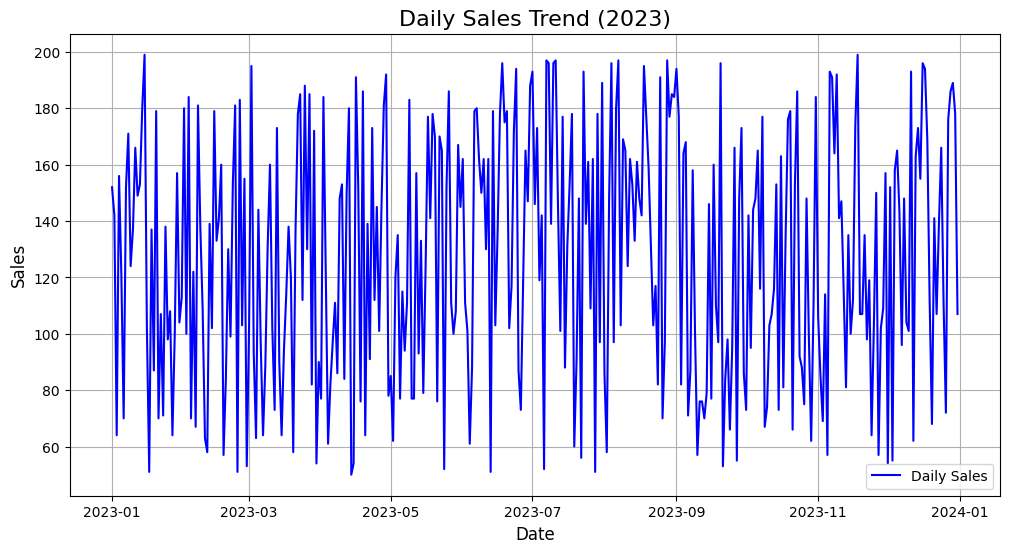

,Date,Daily_Sales
0,2023-01-01,152
1,2023-01-02,142
2,2023-01-03,64
3,2023-01-04,156
4,2023-01-05,121


In [33]:
# Step 1: Create a synthetic time-series dataset
np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", end="2023-12-31", freq='D')
sales_data = np.random.randint(50, 200, size=len(date_range))  # Random daily sales

time_series_data = pd.DataFrame({
    'Date': date_range,
    'Daily_Sales': sales_data
})

# Step 2: Plot the trend of daily sales over time
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Date'], time_series_data['Daily_Sales'], label='Daily Sales', color='blue')
plt.title('Daily Sales Trend (2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Display the first few rows of the synthetic dataset
time_series_data.head()


## Task-3: Handle and Analyze a large dataset efficiently


- Memory Limitation: If a dataset is larger than your system’s RAM, loading it entirely into memory can crash your program.
- Slow Computations: Large datasets take more time to process, and naive methods can be very inefficient.
- Parallelization: Efficient handling often requires breaking the dataset into chunks or using distributed computing.

**Dask** is
a parallel computing library that extends pandas for out-of-memory data.
Allows operations on datasets too large for memory without loading them fully.




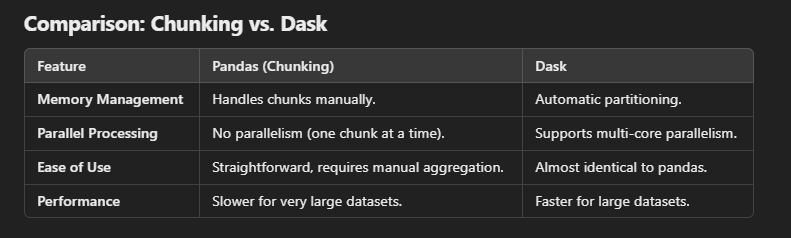

In [34]:
# Initialize an empty list to store results
chunk_results = []

# Process the dataset in chunks
for chunk in pd.read_csv('Datasets/archive/Sales_Data/books_data.csv', chunksize=500000):  # Adjust path & chunk size
    # Example: Count rows per category
    chunk_result = chunk['categories'].value_counts()
    chunk_results.append(chunk_result)

# Combine results from all chunks
final_result = pd.concat(chunk_results).groupby(level=0).sum()

# Display the aggregated result
print(final_result)


categories
["'Abd al-Bah̄a, 1844-1921"]                            1
["Abu Ageila, Battle of, Abu 'Ujaylah, Egypt, 1956"]    1
["Addison's disease"]                                   2
["Alzheimer's disease"]                                 9
["America's Cup"]                                       1
                                                       ..
['Zuni Indians']                                        1
['adventure-juvenile fiction']                          1
['juvenile romance']                                    1
['Ātman']                                               1
['Śaivism']                                             1
Name: count, Length: 10883, dtype: int64


In [35]:
import dask.dataframe as dd

# Load dataset using Dask
dask_df = dd.read_csv('Datasets/archive/Sales_Data/books_data.csv')

# Example: Calculate the mean of a column
mean_ratings = dask_df['ratingsCount'].mean().compute()

print("Mean Ratings Count:", mean_ratings)

Mean Ratings Count: 21.25297475478373


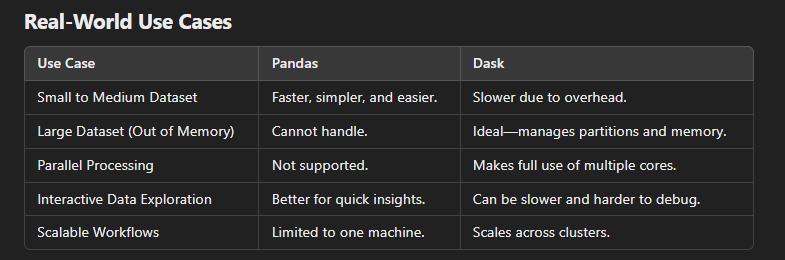

## Task-4: PCA while retaining maximum variance

- High-dimensional data can be noisy or redundant.
- PCA finds new axes (principal components) that maximize variance.

- Variance just measures how much the data is spread out compared to the mean btw (in case I forget)

**Steps**
- Standardize the dataset.
- Compute the covariance matrix.
- Derive eigenvalues and eigenvectors.
- Project data onto the top principal components.

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA
numerical_cols = ['Student ID', 'Question ID', 'Type of Answer']  # Adjust as needed
data_numeric = df[numerical_cols]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Add the principal components to the dataset
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Display explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Display the updated dataset
print(df[['PC1', 'PC2']].head())


Explained Variance Ratio: [0.35076667 0.32880383]
        PC1       PC2
0 -0.585613 -1.778671
1 -2.484002 -0.325570
2 -2.060816 -0.299970
3 -0.594105 -1.779185
4 -1.595169 -0.271801


## Task-5: Removing multicollinearity and VIF

**What is Multicollinearity?**

- When two or more independent variables in a regression model are highly correlated.



**Why It’s Bad:**

- It reduces the interpretability of coefficients in regression models.



**VIF** is used to detect multicollinearity in a dataset. Multicollinearity occurs when two or more features (columns) are highly correlated, which can:

- Cause instability in regression models (coefficients become unreliable).
- Reduce the interpretability of the model.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
housing_df = pd.read_csv('Datasets/House Price Prediction/Housing.csv')

pd.set_option('future.no_silent_downcasting', True)

# Step 2: Preprocessing - Convert categorical columns to numerical
# Replace 'yes' and 'no' with 1 and 0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_df[binary_cols] = housing_df[binary_cols].replace({'yes': 1, 'no': 0}).astype(int)
housing_df['furnishingstatus'] = housing_df['furnishingstatus'].replace(
    {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
).astype(int)



# Select numerical columns for VIF
numerical_cols = housing_df.select_dtypes(include=['int64', 'float64']).columns
data_numeric = housing_df[numerical_cols]

# Step 3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 4: Iteratively calculate and remove high VIF features
vif_data = pd.DataFrame()
threshold = 10  # Set the VIF threshold
while True:
    # Calculate VIF for all features
    vif_data['Feature'] = data_numeric.columns
    vif_data['VIF'] = [variance_inflation_factor(data_scaled, i) for i in range(data_scaled.shape[1])]
    
    # Print current VIF values
    print(vif_data)
    
    # Check if all VIF values are below the threshold
    max_vif = vif_data['VIF'].max()
    if max_vif < threshold:
        break

    # Drop the feature with the highest VIF
    high_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
    print(f"Dropping feature: {high_vif_feature} with VIF: {max_vif}")
    data_numeric = data_numeric.drop(columns=[high_vif_feature])
    data_scaled = scaler.fit_transform(data_numeric)

# Final VIF values
print("Final VIF values:")
print(vif_data)


     Feature      VIF
0      price 2.280931
1       area 1.507595
2   bedrooms 1.326598
3  bathrooms 1.464354
4    stories 1.402509
5    parking 1.233177
Final VIF values:
     Feature      VIF
0      price 2.280931
1       area 1.507595
2   bedrooms 1.326598
3  bathrooms 1.464354
4    stories 1.402509
5    parking 1.233177
